<a href="https://colab.research.google.com/github/Arshhasan/-Exorde-Labs-Social-Media-Data-Analysis/blob/main/Social_media_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://huggingface.co/datasets/Exorde/exorde-social-media-december-2024-week1

--2024-12-15 11:24:13--  https://huggingface.co/datasets/Exorde/exorde-social-media-december-2024-week1
Resolving huggingface.co (huggingface.co)... 3.171.171.6, 3.171.171.65, 3.171.171.128, ...
Connecting to huggingface.co (huggingface.co)|3.171.171.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 604293 (590K) [text/html]
Saving to: ‘exorde-social-media-december-2024-week1.1’

exorde-social-media 100%[===================>] 590.13K  --.-KB/s    in 0.05s   

2024-12-15 11:24:13 (10.6 MB/s) - ‘exorde-social-media-december-2024-week1.1’ saved [604293/604293]



In [2]:
!pip install datasets

**Exploratory Analysis of the dataset**

In [3]:
from datasets import load_dataset

ds = load_dataset("Exorde/exorde-social-media-december-2024-week1")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Resolving data files:   0%|          | 0/132 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/44 [00:00<?, ?it/s]

In [4]:
# ds.shape
first_example = ds['train'][0]
print(first_example)

{'date': '2024-12-01T00:00:00.000Z', 'original_text': 'Ｑ:\n銀杏並木からラグビー場東門に通じる港区の区道の廃止手続きはいつを予定していますか？\n\nＡ:\n当該エリアの整備に着手（2028年予定）する前までに関係行政機関と協議しながら適切な時期に進めてまいります。\n\n#神宮外苑地区まちづくり #計画の枠組み #いちょう並木\nhttps://jingugaienmachidukuri.jp/faq/#anchor09', 'url': 'https://x.com/L6K6REOaiF71115/status/1863010120143184160', 'author_hash': '619fca2174ff02b246aae19903b1cf5d55be82b9', 'language': 'ja', 'primary_theme': 'Politics', 'english_keywords': 'namiki, area, gate, east, harbor, framework, planning, icho, development, q:\ndo, abolish, jingugaienmachidukuri, rugby stadium, harbor ward, ward, jingumae, gaien, rugby, jingumae gaien, ging, plan, trajectory, east gate, tree, stadium', 'sentiment': -0.23, 'main_emotion': 'neutral', 'secondary_themes': [3, 11, 7]}


In [5]:
print(ds['train'].features)

{'date': Value(dtype='string', id=None), 'original_text': Value(dtype='string', id=None), 'url': Value(dtype='string', id=None), 'author_hash': Value(dtype='string', id=None), 'language': Value(dtype='string', id=None), 'primary_theme': Value(dtype='string', id=None), 'english_keywords': Value(dtype='string', id=None), 'sentiment': Value(dtype='float64', id=None), 'main_emotion': Value(dtype='string', id=None), 'secondary_themes': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None)}


In [7]:
from collections import Counter


In [8]:


# Get the 'language' column
languages = ds['train']['language']

# Count the occurrences of each language
language_counts = Counter(languages)

# Print the results
print(f"Number of languages: {len(language_counts)}")
for language, count in language_counts.items():
    print(f"Language: {language}, Data points: {count}")

Number of languages: 122
Language: ja, Data points: 3215049
Language: en, Data points: 47123102
Language: vi, Data points: 61751
Language: hi, Data points: 236021
Language: zh, Data points: 281511
Language: el, Data points: 30826
Language: es, Data points: 4370574
Language: tr, Data points: 742920
Language: it, Data points: 626293
Language: de, Data points: 1124985
Language: pt, Data points: 3089805
Language: fi, Data points: 85326
Language: ru, Data points: 313618
Language: fr, Data points: 1291914
Language: cs, Data points: 25799
Language: tl, Data points: 55268
Language: sr, Data points: 35006
Language: th, Data points: 100988
Language: hr, Data points: 19852
Language: bg, Data points: 14039
Language: bn, Data points: 29714
Language: id, Data points: 588700
Language: ar, Data points: 732799
Language: fa, Data points: 229881
Language: da, Data points: 50604
Language: ko, Data points: 108531
Language: sk, Data points: 17923
Language: ro, Data points: 31713
Language: ca, Data points: 4

In [9]:
!pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 34.8 MB/s eta 0:00:00


In [21]:
import pycountry

language_names = []
data_points = []
percentages = []  # List to store percentages

for language_code, count in language_counts.items():
    try:
        language_name = pycountry.languages.get(alpha_2=language_code).name
    except AttributeError:
        language_name = language_code  # Use the code if full name not found

    language_names.append(language_name)
    data_points.append(count)
    print(f"Language: {language_name}, Data points: {count}")


Language: Japanese, Data points: 3215049
Language: English, Data points: 47123102
Language: Vietnamese, Data points: 61751
Language: Hindi, Data points: 236021
Language: Chinese, Data points: 281511
Language: Modern Greek (1453-), Data points: 30826
Language: Spanish, Data points: 4370574
Language: Turkish, Data points: 742920
Language: Italian, Data points: 626293
Language: German, Data points: 1124985
Language: Portuguese, Data points: 3089805
Language: Finnish, Data points: 85326
Language: Russian, Data points: 313618
Language: French, Data points: 1291914
Language: Czech, Data points: 25799
Language: Tagalog, Data points: 55268
Language: Serbian, Data points: 35006
Language: Thai, Data points: 100988
Language: Croatian, Data points: 19852
Language: Bulgarian, Data points: 14039
Language: Bengali, Data points: 29714
Language: Indonesian, Data points: 588700
Language: Arabic, Data points: 732799
Language: Persian, Data points: 229881
Language: Danish, Data points: 50604
Language: Kor

In [13]:
!pip install pycountry matplotlib  # Install necessary libraries


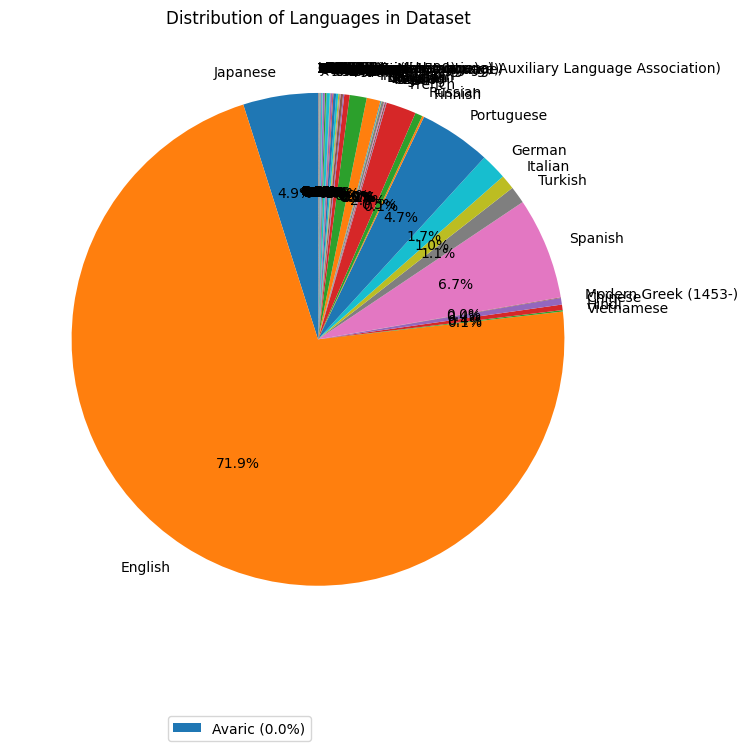

In [22]:
import matplotlib.pyplot as plt

total_data_points = sum(language_counts.values())
percentage = (count / total_data_points) * 100
percentages.append(f"{language_name} ({percentage:.1f}%)")  # Format percentage


plt.figure(figsize=(8, 8))  # Adjust figure size if needed
plt.pie(data_points, labels=language_names, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Languages in Dataset')
plt.legend(, loc="best",bbox_to_anchor=(0.5, -0.1)) #loc will adjust legend for best viewing
plt.show()

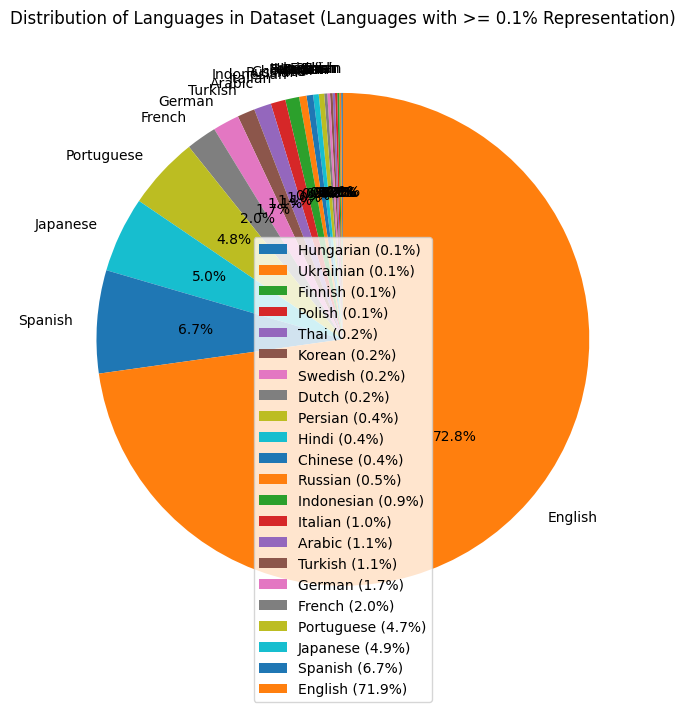

In [31]:
from datasets import load_dataset
from collections import Counter
import pycountry
import matplotlib.pyplot as plt

# Load the dataset

# Get the 'language' column
languages = ds['train']['language']

# Count the occurrences of each language
language_counts = Counter(languages)

# Calculate total data points
total_data_points = sum(language_counts.values())

# Filter out languages with less than 0.1% representation
filtered_language_counts = {
    language: count for language, count in language_counts.items()
    if (count / total_data_points) * 100 >= 0.1
}

# Sort languages by percentage in ascending order
sorted_languages = sorted(filtered_language_counts.items(), key=lambda item: item[1], reverse=False)

# Prepare data for the pie chart
language_names = []
data_points = []
percentages = []

for language_code, count in sorted_languages:  # Use filtered counts
    try:
        language_name = pycountry.languages.get(alpha_2=language_code).name
    except AttributeError:
        language_name = language_code  # Use the code if full name not found
    language_names.append(language_name)
    data_points.append(count)

    # Calculate and store percentage for each language
    percentage = (count / total_data_points) * 100
    percentages.append(f"{language_name} ({percentage:.1f}%)")  # Format percentage

# Create the pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size if needed
plt.pie(data_points, labels=language_names, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Languages in Dataset (Languages with >= 0.1% Representation)')

# Add a legend with percentages at the bottom
plt.legend(percentages, loc="lower center", bbox_to_anchor=(0.5, -0.1))

plt.show() #To see the output, run the code.

Here is the representation of the data point based on the language